In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housingdata/data_description.txt
/kaggle/input/housingdata/train.csv


## House Price Prediction - Advanced regression Assignment 
### ------------------------------------------------------------------------------------------------------ 

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Observation and inference

In [2]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [3]:
# Read data from csv
df = pd.read_csv('/kaggle/input/housingdata/train.csv')

In [4]:
# Check head of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# checking shape of dataframe
df.shape

(1460, 81)

In [6]:
# get info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# checking for null values in column data
type(df.isnull().sum())
s= df.isnull().sum().sort_values(ascending=False)
s[s!=0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [8]:
#checking duplicates
sum(df.duplicated(subset = 'Id')) == 0

True

In [9]:
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# Checking for percentage nulls
s=round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)
s[s!=0.00]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
Electrical       0.07
dtype: float64

### Outlier Check

In [10]:
#Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


### Method to remove outliers.

In [11]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [12]:
#Checking the shape of the dataframe
df.shape

(1460, 81)

In [13]:
# Group and Remove nulls
df.columns[df.isnull().any()] 

null = df.isnull().sum()/len(df)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [14]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'None'
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    df[i].fillna("none", inplace=True)

In [15]:
# Check nulls once again

df.columns[df.isnull().any()] 

null_2 = df.isnull().sum()/len(df)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [16]:
# Will check these columns one by one
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [17]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [18]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [19]:
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [20]:
#"LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values
#Similarly for GarageYrBlt, MasVnrArea and Electrical, we will compute median for null values
df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["Electrical"].dropna(inplace=True)

In [21]:
# Crosscheck the updated 'LotFrontage' column
df['LotFrontage'].describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [22]:
df['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [23]:
df['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [24]:
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [25]:
# Check the no. of rows retained
len(df.index)
len(df.index)/1460

1.0

### EDA

In [26]:
#All numeric (float and int) variables in the dataset
data_numeric = df.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [27]:
# Dropping ID Column
data_numeric = data_numeric.drop(['Id'], axis=1)
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

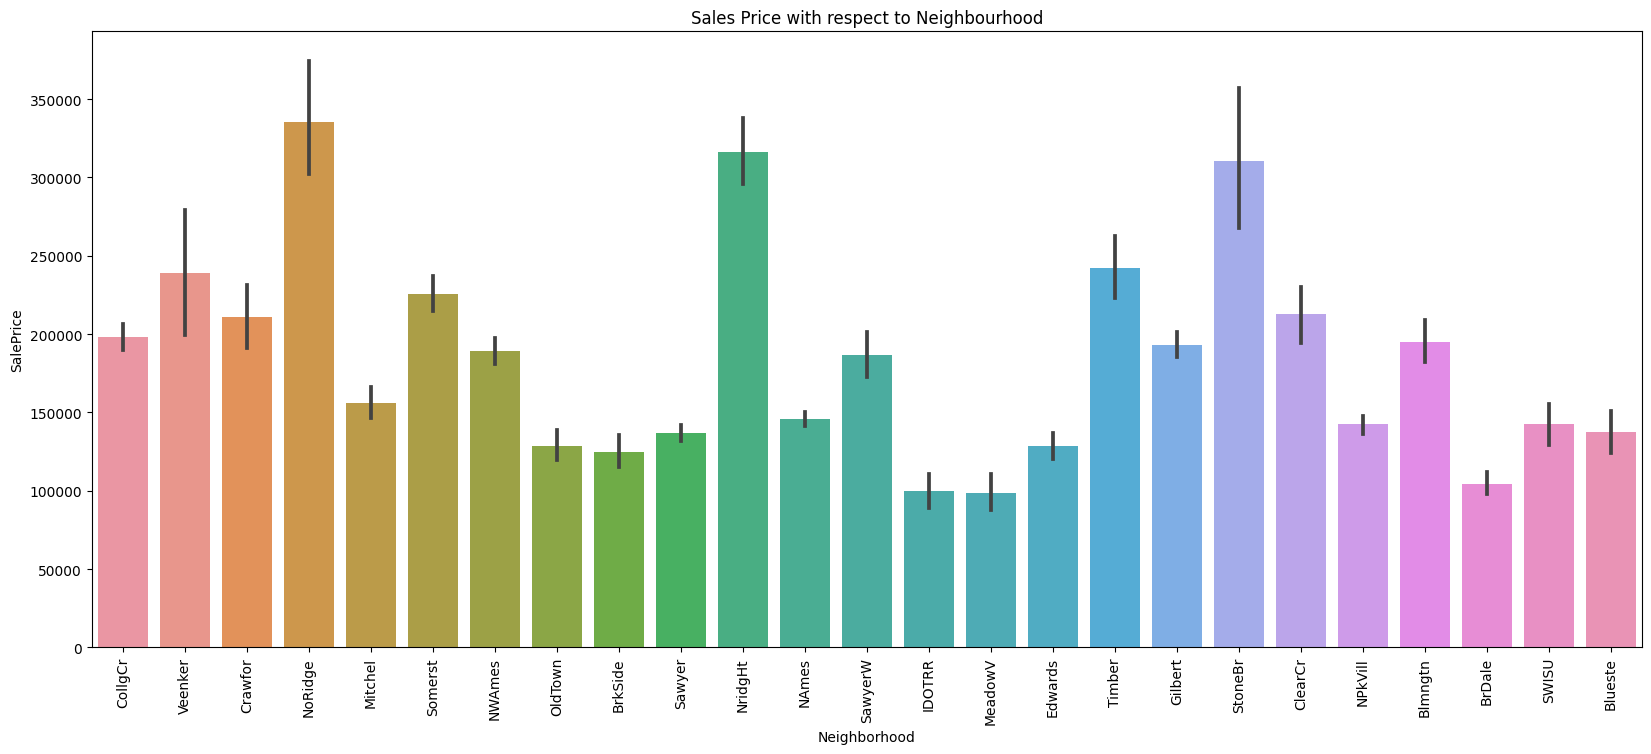

In [28]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data=df)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

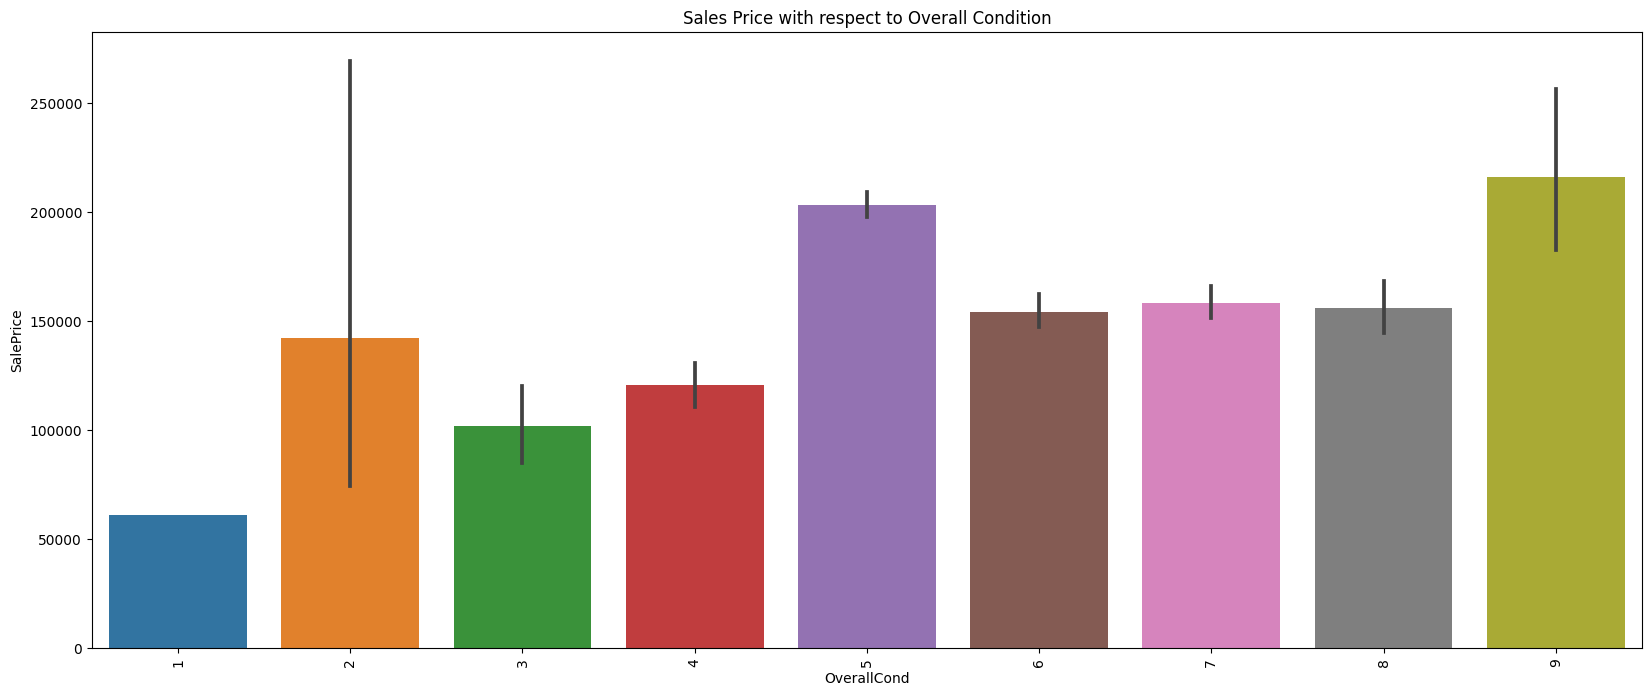

In [29]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data=df)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

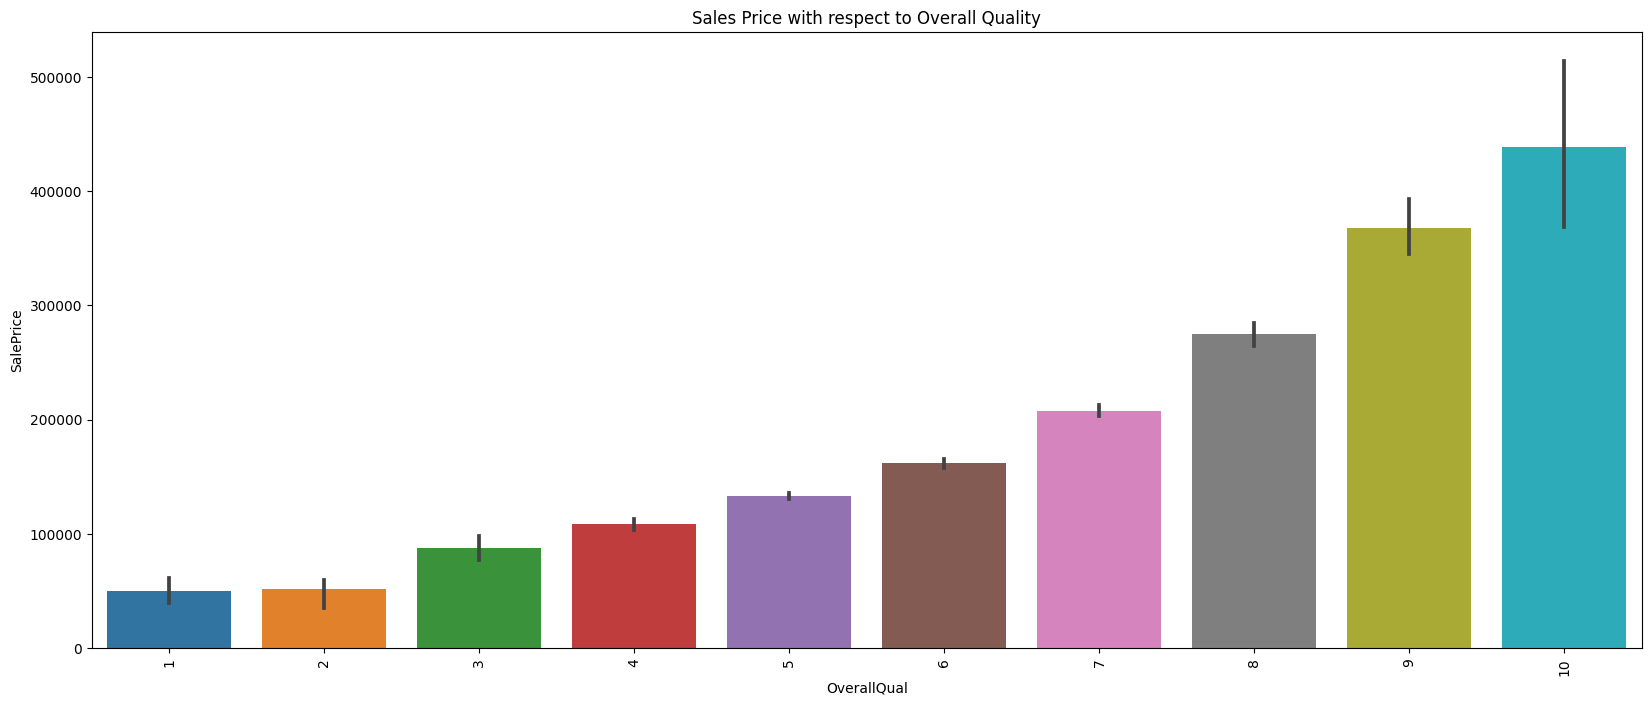

In [30]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data=df)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

#### Increase in the overall quality has a direct positive effect on the sale price

<Axes: xlabel='SalePrice', ylabel='Density'>

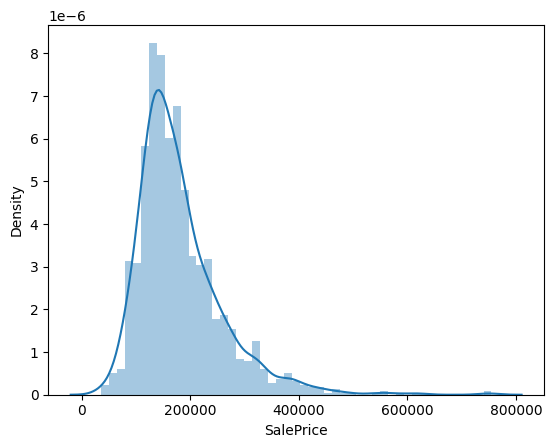

In [31]:
sns.distplot(df['SalePrice'])

In [32]:
data_raw = df.copy

### Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

In [33]:
#Log Transformation
df['SalePrice']=np.log1p(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

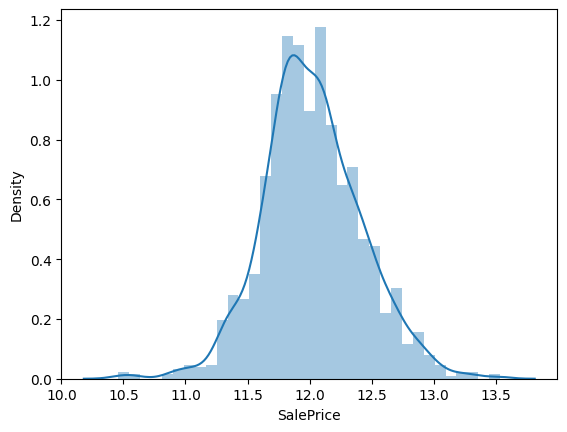

In [34]:
sns.distplot(df['SalePrice'])

In [35]:
# correlation matrix
cor = data_numeric.corr()
cor


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,...,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.349876
LotArea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


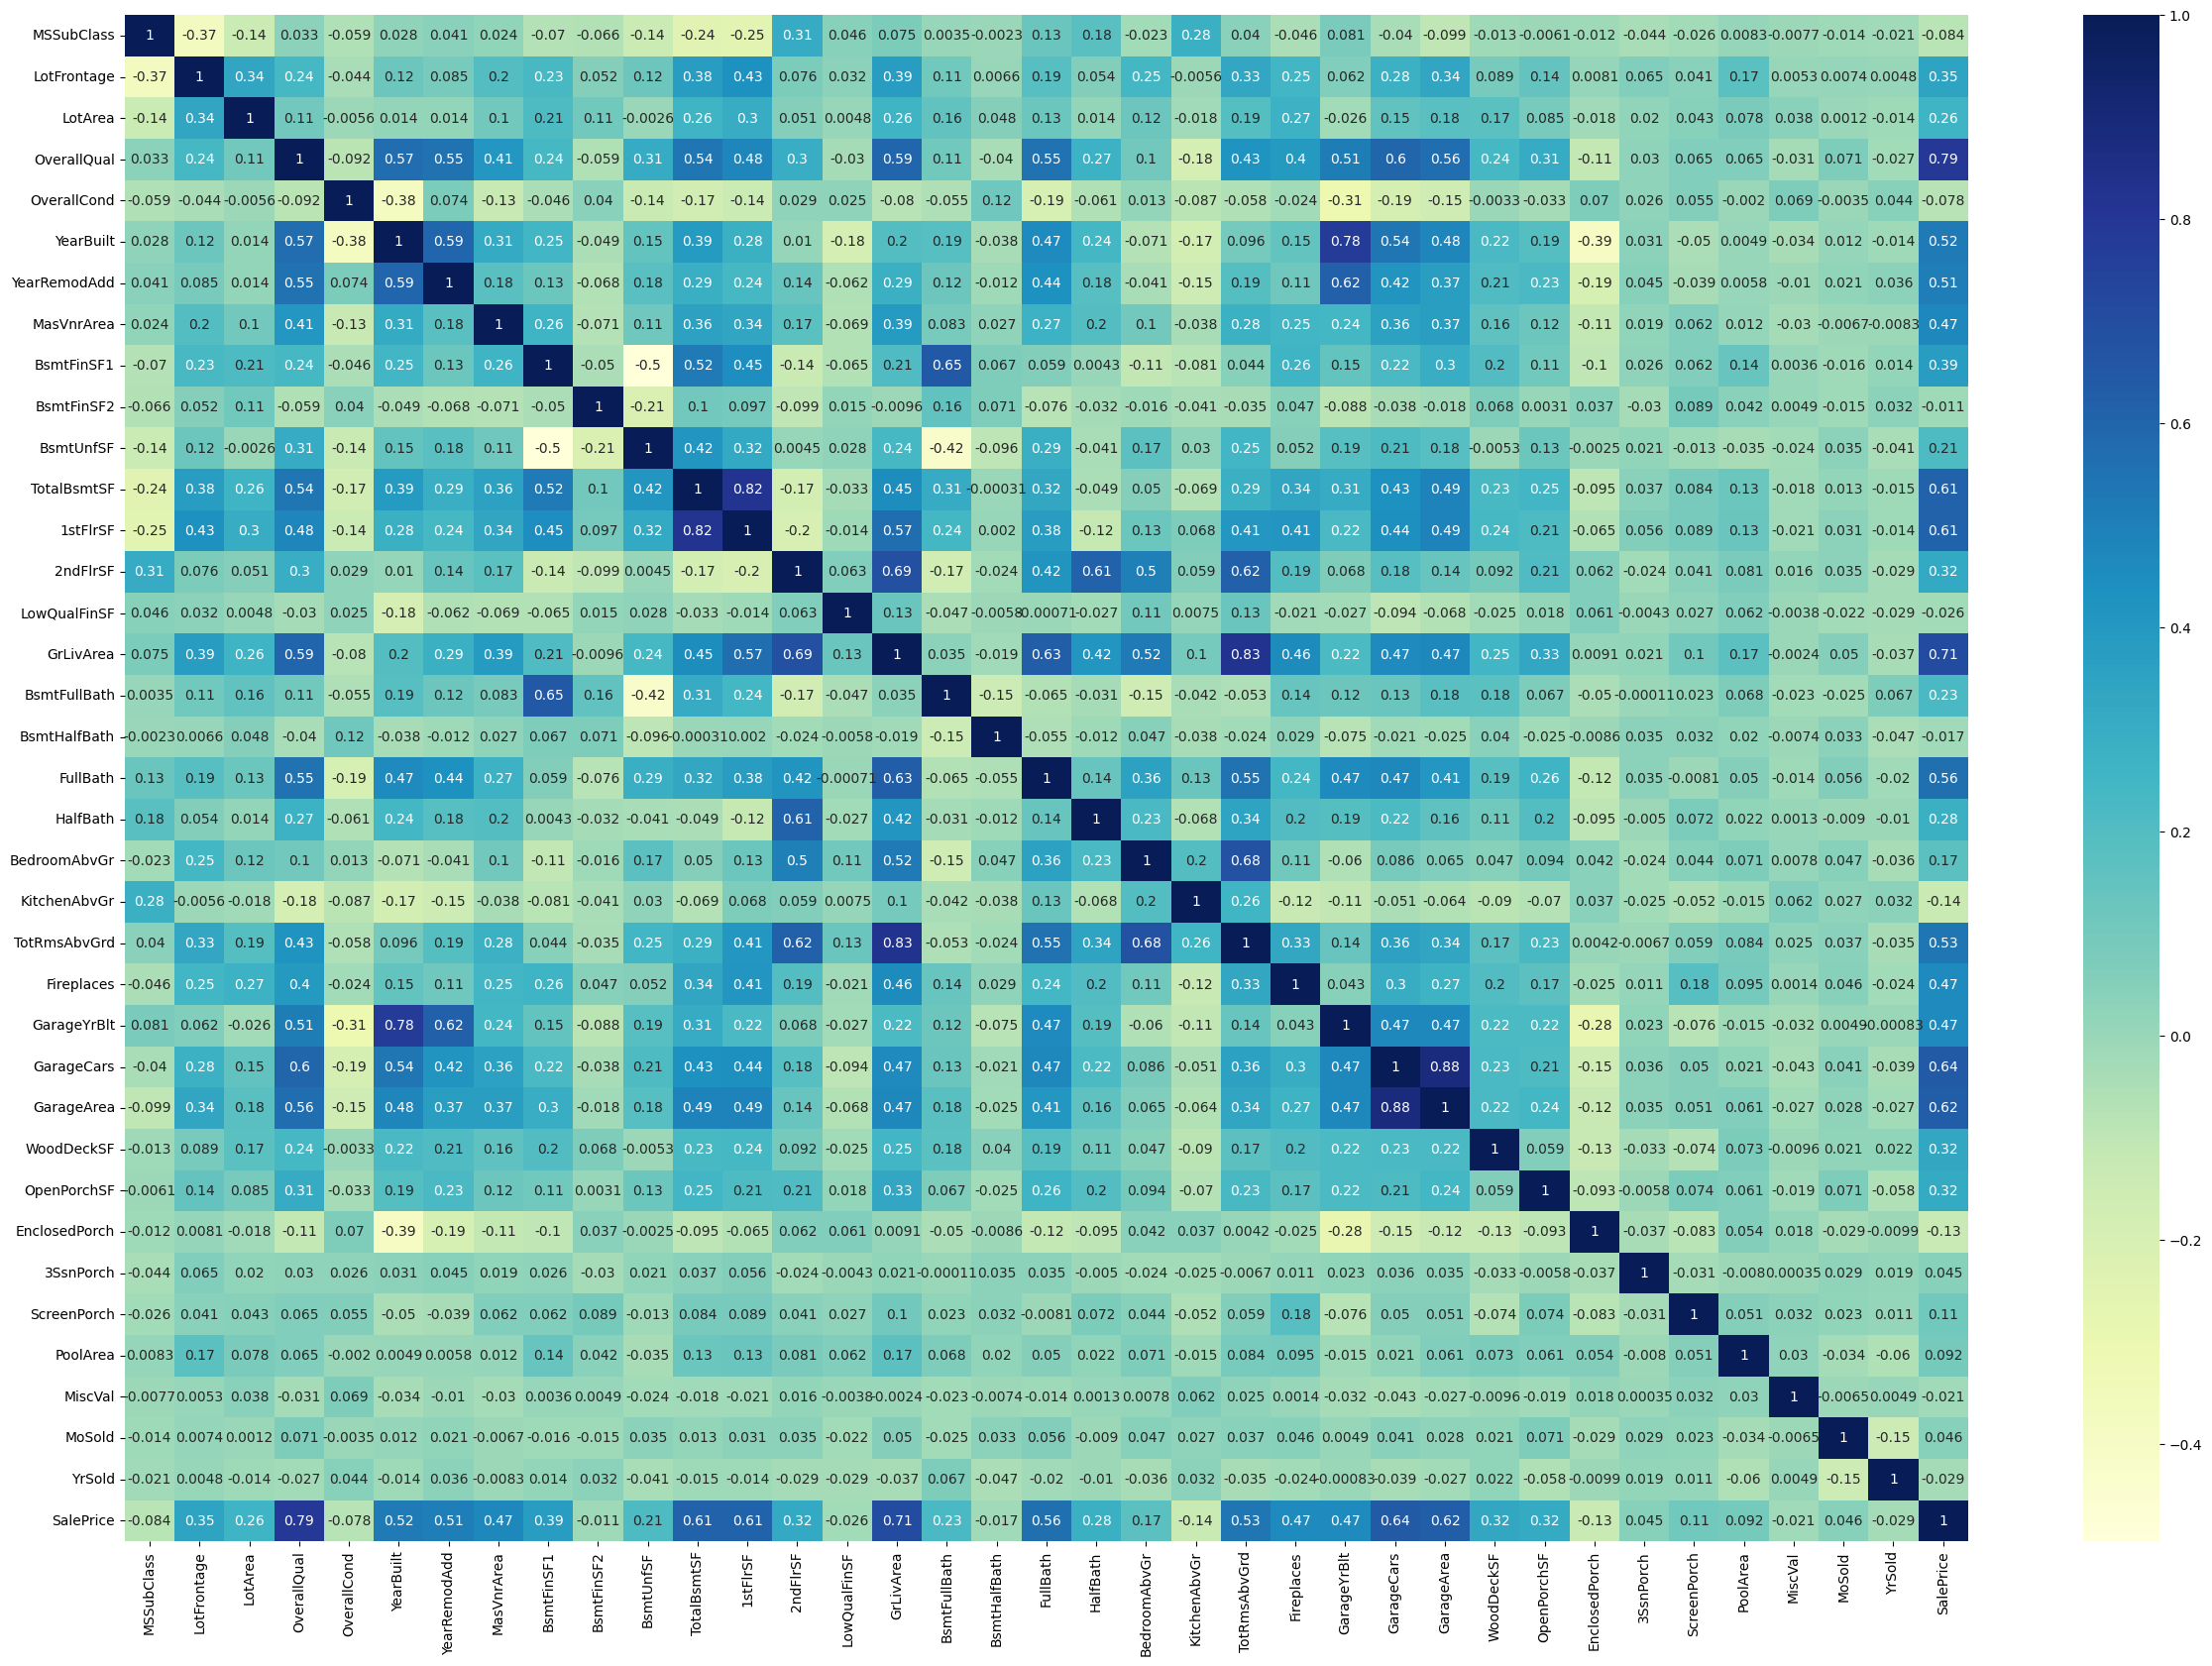

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### We can see that some of the variables are correlated

#### Before dropping these columns, we will first check their predictive power

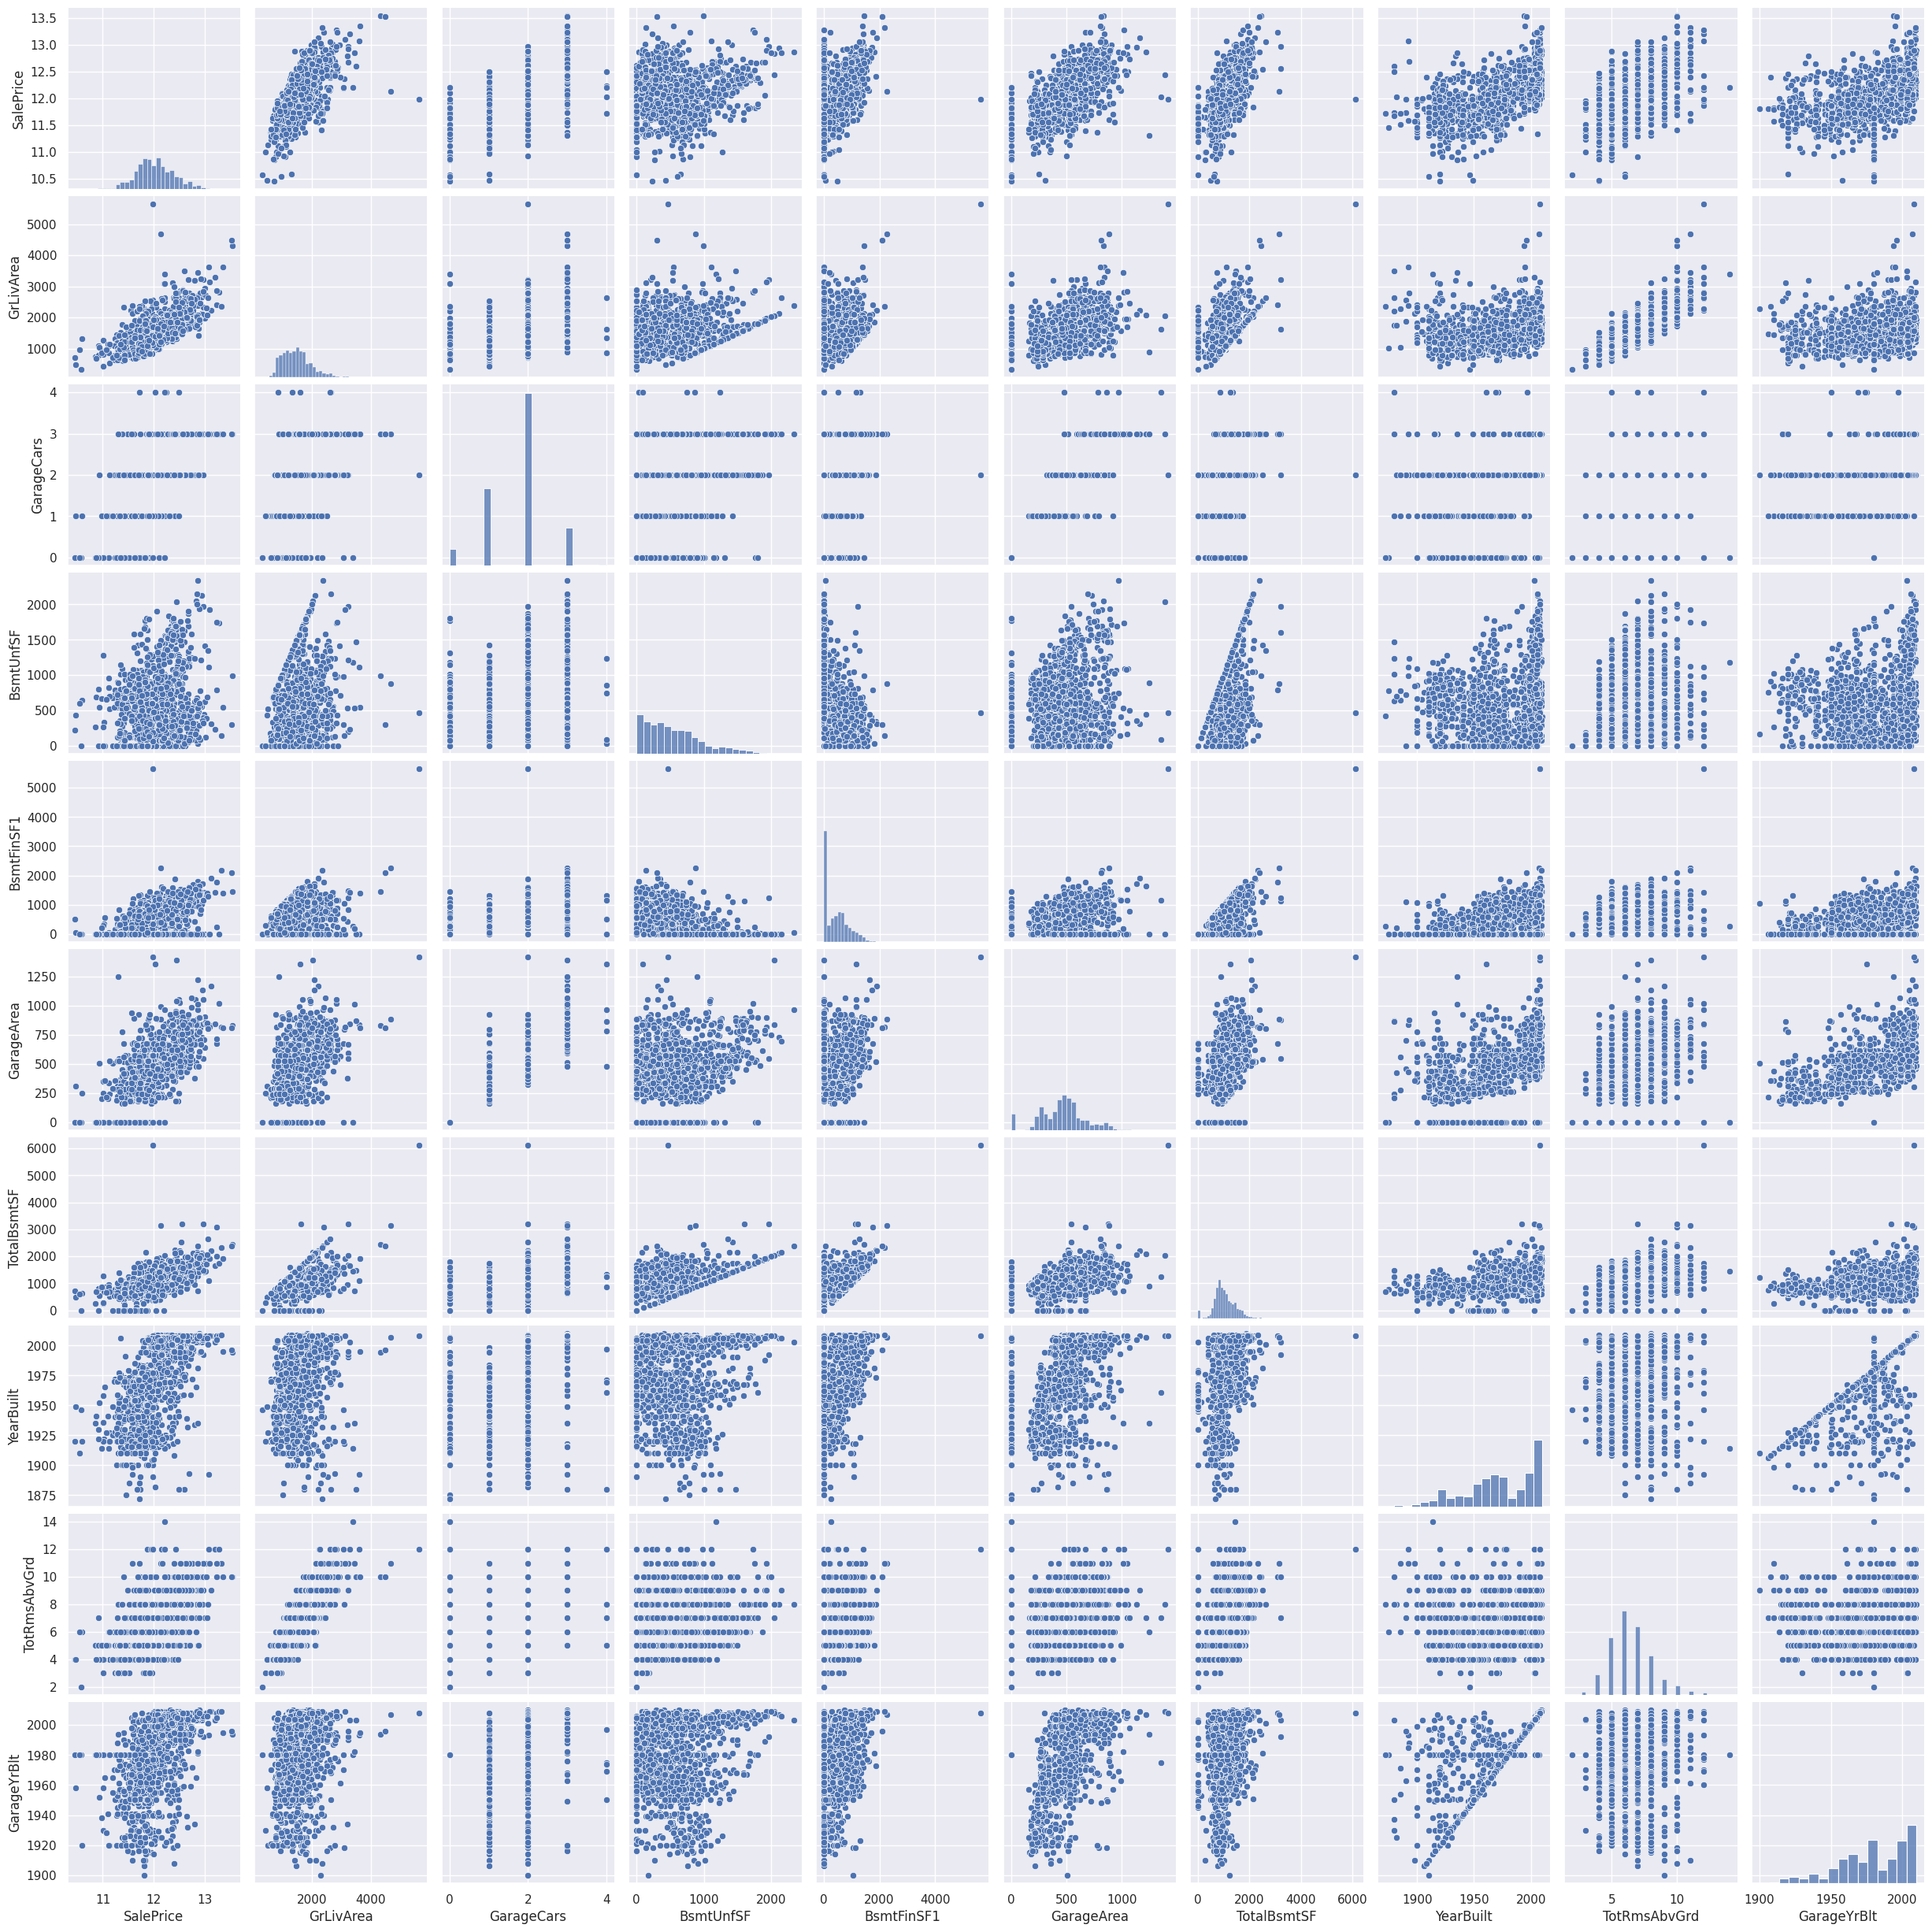

In [42]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

### Drop columns that are correlated and not contributing to 'SalePrice'

In [43]:
df = df.drop(['GarageCars'], axis = 1)
df = df.drop(['BsmtUnfSF'], axis = 1)
df = df.drop(['TotRmsAbvGrd'], axis = 1)
df = df.drop(['GarageYrBlt'], axis = 1)    

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,12,2008,WD,Normal,12.429220


In [44]:
#Numeric columns
df.select_dtypes(exclude=['object'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,12.072547
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,12.254868
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,12.493133
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,11.864469


In [45]:
df.shape

(1460, 77)

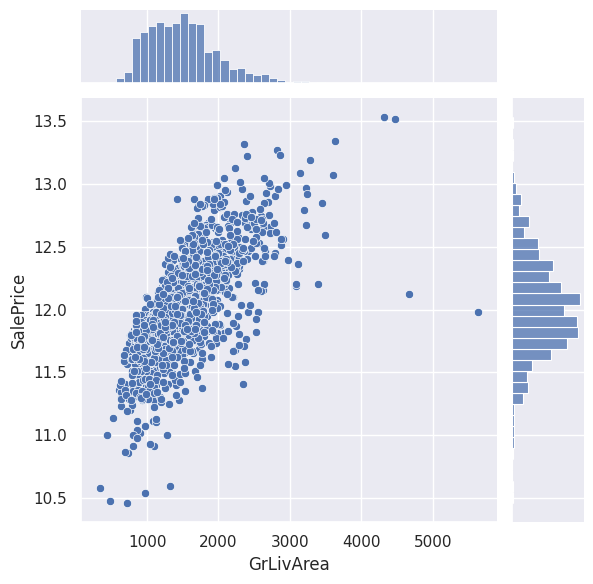

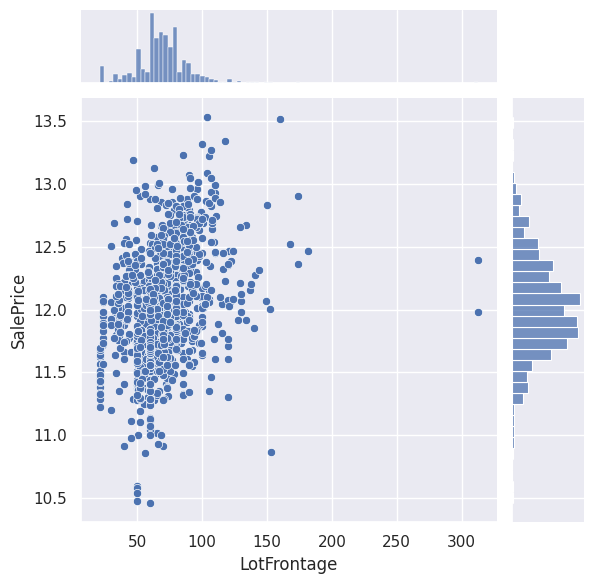

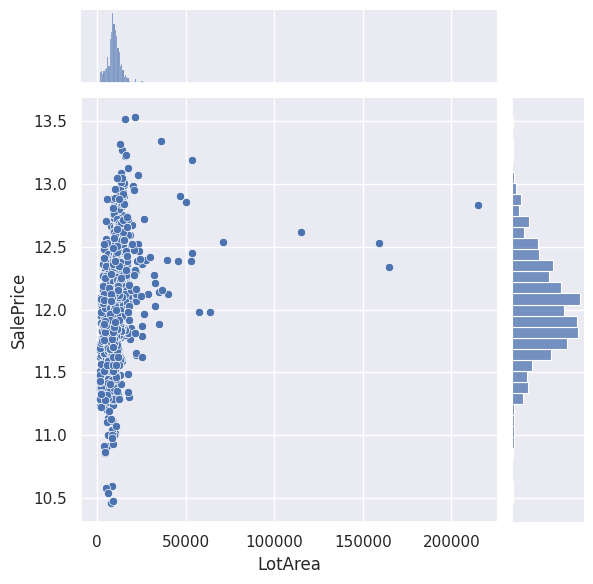

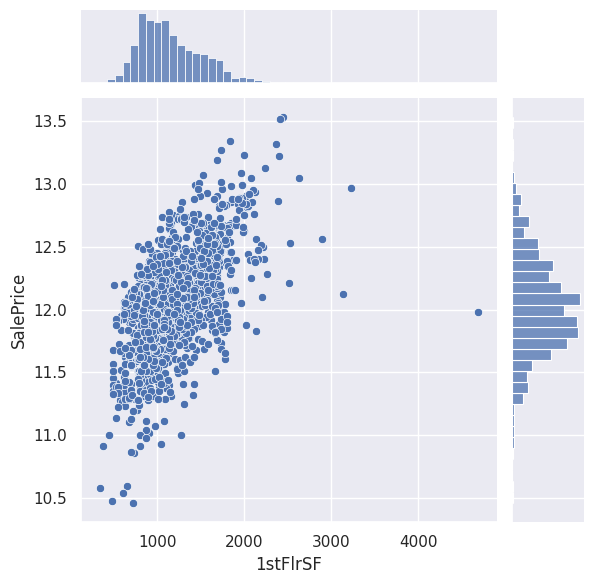

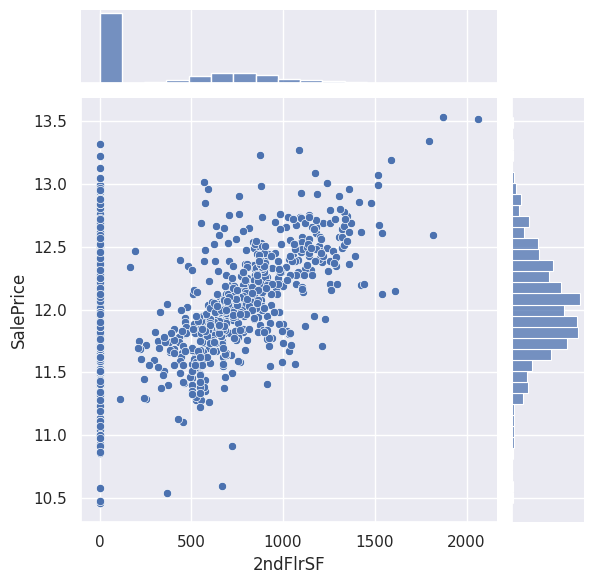

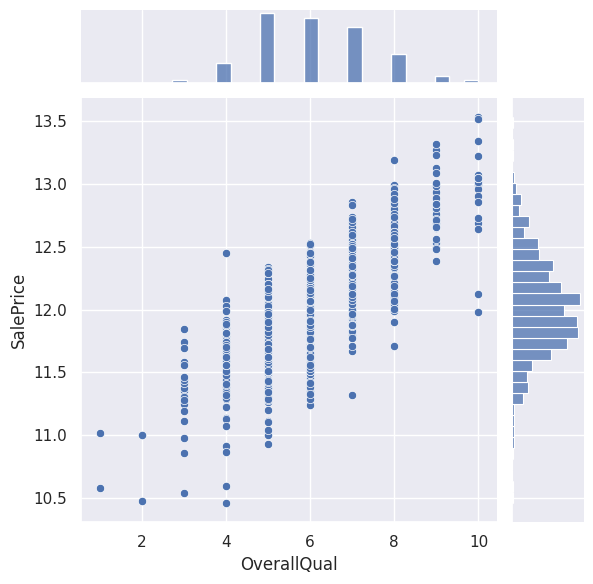

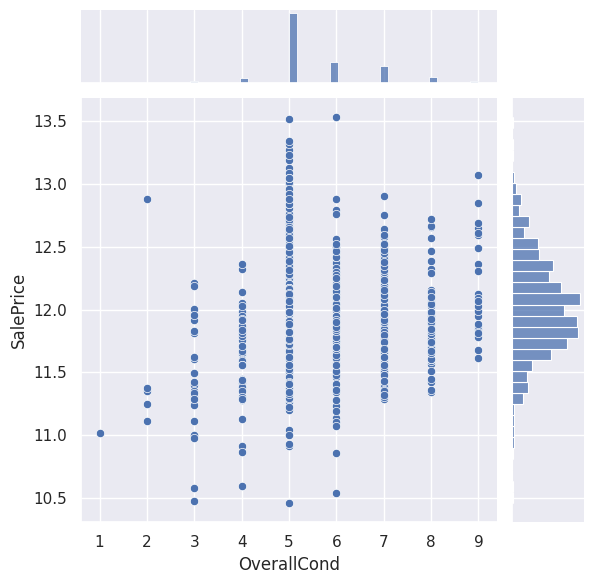

In [46]:
numeric_cols = ['GrLivArea', 'LotFrontage', 'LotArea','1stFlrSF', '2ndFlrSF', 'OverallQual','OverallCond']

for col in numeric_cols:
    sns.jointplot(x=col, y='SalePrice', data=df)
plt.show()

In [47]:
df.shape

(1460, 77)

#### Ground or First level houses i.e. '0' second floor Sq.Ft has also a steady increase

### We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'

In [48]:
# PropAge -  Property Age from yearsold - yearbuilt
df['PropAge'] = (df['YrSold'] - df['YearBuilt'])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,12,2008,WD,Normal,12.429220,8


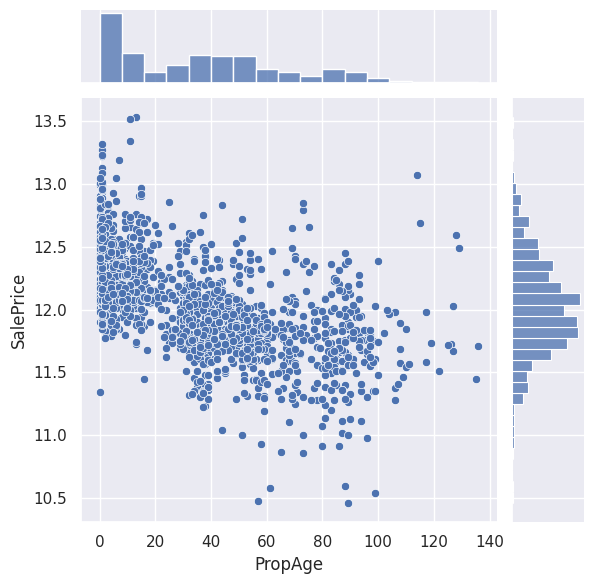

In [49]:
# PropAge vs SalePrice
sns.jointplot(x = df['PropAge'], y = df['SalePrice'])
plt.show()

#### Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value

In [50]:
#Dropping the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further
df = df.drop(['MoSold'], axis = 1)
df = df.drop(['YrSold'], axis = 1)
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YearRemodAdd'], axis = 1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.429220,8


In [51]:
df.Street.value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [52]:
df.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [53]:
# We can also drop columns that show very low variance and thus not required for predictions
df = df.drop(['Street'], axis = 1)
df = df.drop(['Utilities'], axis = 1)

### Just to check the variance of these columns 

In [54]:
# l1 = ['Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'BsmtCond', 'GarageQual', 'GarageCond', 'MiscVal', '3SsnPorch', 'FireplaceQu', 'BsmtHalfBath', 'BsmtFinSF2', 'Alley', 'MiscFeature', 'Fence', 'Functional']
l2= df.select_dtypes(include=['float64', 'int64'])
l2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropAge
0,1,60,65.0,8450,7,5,196.0,706,0,856,...,548,0,61,0,0,0,0,0,12.247699,5
1,2,20,80.0,9600,6,8,0.0,978,0,1262,...,460,298,0,0,0,0,0,0,12.109016,31
2,3,60,68.0,11250,7,5,162.0,486,0,920,...,608,0,42,0,0,0,0,0,12.317171,7
3,4,70,60.0,9550,7,5,0.0,216,0,756,...,642,0,35,272,0,0,0,0,11.849405,91
4,5,60,84.0,14260,8,5,350.0,655,0,1145,...,836,192,84,0,0,0,0,0,12.429220,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,0.0,0,0,953,...,460,0,40,0,0,0,0,0,12.072547,8
1456,1457,20,85.0,13175,6,6,119.0,790,163,1542,...,500,349,0,0,0,0,0,0,12.254868,32
1457,1458,70,66.0,9042,7,9,0.0,275,0,1152,...,252,0,60,0,0,0,0,2500,12.493133,69
1458,1459,20,68.0,9717,5,6,0.0,49,1029,1078,...,240,366,0,112,0,0,0,0,11.864469,60


In [55]:
for i in l2:
    print(df[i].value_counts())

Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
LotFrontage
60.0     152
80.0     112
70.0      94
65.0      74
73.0      70
        ... 
137.0      1
140.0      1
38.0       1
150.0      1
46.0       1
Name: count, Length: 115, dtype: int64
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64
OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64
OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64
MasVnrArea
0.0

In [56]:
df = df.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

### These Columns were having high null values, some of which were imputed. After imputing, it was found that there was very little variance in the data. So we have decided to drop these columns.

In [57]:
df.shape

(1460, 63)

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [58]:
# Drop 'Id' from Dataframe

df = df.drop(['Id'], axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,none,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,none,WD,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,none,WD,Normal,12.317171,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0,0,none,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,none,WD,Normal,12.429220,8


In [59]:
#type of each feature in data: int, float, object
types = df.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [60]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

0
object     33
int64      26
float64     3
Name: count, dtype: int64

In [61]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [62]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


### Creating Dummy columns to convert categorical into numerical

In [63]:
df = pd.get_dummies(df, drop_first=True )
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,False,False,False,False,True,False,False,False,True,False


In [64]:
X = df.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,False,False,False,False,True,False,False,False,True,False


In [65]:
# Putting response variable to y
y = df['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [68]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])


In [70]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,-0.870387,0.612765,0.166080,-0.059996,1.252715,-0.575015,0.085426,-0.283127,0.347365,2.572160,...,False,False,False,False,True,False,False,False,True,False
1408,0.304785,-0.432534,-0.261043,-1.501313,1.252715,-0.575015,-0.943351,-0.283127,-0.973680,-1.069794,...,False,False,False,False,True,False,False,False,True,False
1148,-0.165284,-0.432534,-0.439778,0.660663,1.252715,-0.575015,-0.943351,-0.283127,-1.087563,-1.504156,...,False,False,False,False,True,False,False,False,True,False
861,3.125199,0.220778,0.079341,-0.780655,-1.406374,-0.575015,0.870488,-0.283127,-0.023894,-0.303879,...,False,False,False,False,True,False,False,False,True,False
220,-0.870387,0.133670,-0.151525,0.660663,-0.520011,-0.575015,-0.943351,-0.283127,1.021554,0.875837,...,False,False,True,False,False,False,False,False,False,True


In [71]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
930,-0.879672,0.106932,-0.211538,1.358461,-0.509551,-0.560080,-1.009468,-0.301886,0.899165,0.771223,...,False,False,False,False,True,False,False,False,True,False
530,0.559791,0.676372,0.029981,-0.099887,-0.509551,0.597117,0.743814,-0.301886,0.887692,0.884656,...,False,False,False,False,True,False,False,False,False,False
1291,2.479076,-2.360638,-1.583933,-0.829061,1.350309,0.856033,-0.518001,-0.301886,-1.019124,-1.434127,...,False,False,False,False,True,False,False,False,True,False
1385,-0.159940,-1.459026,-0.872447,-1.558235,2.280239,-0.560080,0.634091,-0.301886,-0.638220,-0.996222,...,False,False,False,False,True,False,False,False,True,False
305,-0.879672,0.439105,0.065215,1.358461,-0.509551,0.739785,2.300508,-0.301886,2.124484,2.179903,...,False,False,False,False,True,False,False,False,True,False


## 3. Model Building and Evaluation

## Lets first check the model using Linear Regression and RFE (OPTIONAL)

In [72]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [73]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, n_features_to_select = 100)            
rfe = rfe.fit(X_train, y_train)

In [74]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 105),
 ('LotFrontage', False, 89),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 98),
 ('BsmtFinSF1', False, 42),
 ('BsmtFinSF2', False, 95),
 ('TotalBsmtSF', False, 94),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 37),
 ('BsmtHalfBath', False, 109),
 ('FullBath', False, 45),
 ('HalfBath', False, 52),
 ('BedroomAbvGr', False, 73),
 ('KitchenAbvGr', False, 75),
 ('Fireplaces', False, 76),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 87),
 ('OpenPorchSF', False, 100),
 ('EnclosedPorch', False, 83),
 ('3SsnPorch', False, 93),
 ('ScreenPorch', False, 79),
 ('PoolArea', False, 63),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 43),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 92),
 ('LandContour_HLS', True, 1),
 ('

In [87]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'PropAge', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',


In [88]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'GarageQual_TA', 'PavedDrive_P', 'PavedDrive_Y', 'MiscFeature_TenC',
       'MiscFeature_none', 'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_WD', 'SaleCondition_Family'],
      dtype='object', length=110)

In [89]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [90]:
X_train_rfe = pd.DataFrame(X_train[col])

In [91]:
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,PropAge,MSZoning_FV,...,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
175,0.166080,-0.059996,1.252715,2.572160,-0.797551,-0.121406,1.229791,0.478002,0.660066,False,...,False,False,False,False,False,False,False,False,True,False
1408,-0.261043,-1.501313,1.252715,-1.069794,0.630928,-0.121406,-0.279140,0.256615,2.066739,False,...,False,False,False,False,False,False,False,False,True,False
1148,-0.439778,0.660663,1.252715,-1.504156,0.440311,-0.121406,-0.757443,-0.850325,1.477899,False,...,False,False,False,False,False,False,False,False,True,False
861,0.079341,-0.780655,-1.406374,-0.303879,-0.797551,-0.121406,-0.894101,0.145921,0.267506,False,...,False,False,False,False,False,False,False,False,True,False
220,-0.151525,0.660663,-0.520011,0.875837,-0.797551,-0.121406,-0.022906,0.934615,-1.204594,False,...,False,False,False,False,True,False,False,False,False,True


In [92]:
X_train_rfe.shape

(1021, 100)

In [94]:
# predict
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9275112546429818

In [96]:
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

-8.338656438592698e+20

## Since the Test R2 is too low, we will check for some alternate methods of Regression

In [97]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 105),
 ('LotFrontage', False, 89),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 98),
 ('BsmtFinSF1', False, 42),
 ('BsmtFinSF2', False, 95),
 ('TotalBsmtSF', False, 94),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 37),
 ('BsmtHalfBath', False, 109),
 ('FullBath', False, 45),
 ('HalfBath', False, 52),
 ('BedroomAbvGr', False, 73),
 ('KitchenAbvGr', False, 75),
 ('Fireplaces', False, 76),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 87),
 ('OpenPorchSF', False, 100),
 ('EnclosedPorch', False, 83),
 ('3SsnPorch', False, 93),
 ('ScreenPorch', False, 79),
 ('PoolArea', False, 63),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 43),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 92),
 ('LandContour_HLS', True, 1),
 ('

In [98]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'PropAge', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',


In [100]:
X_test_rfe = X_test[col1]
X_test_rfe.head()

,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,PropAge,MSZoning_FV,...,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
930,-0.211538,1.358461,-0.509551,0.771223,-0.791130,-0.119344,-0.117457,0.657098,-1.150291,False,...,False,False,False,False,False,False,False,False,True,False
530,0.029981,-0.099887,-0.509551,0.884656,-0.791130,-0.119344,-0.035051,0.608692,-0.539797,False,...,False,False,False,False,False,False,False,False,False,False
1291,-1.583933,-0.829061,1.350309,-1.434127,0.740428,-0.119344,-0.431748,-1.017758,0.036781,False,...,False,False,False,False,False,False,False,False,True,False
1385,-0.872447,-1.558235,2.280239,-0.996222,0.024789,-0.119344,-0.715377,-1.133933,1.766516,False,...,False,False,False,False,False,False,False,False,True,False
305,0.065215,1.358461,-0.509551,2.179903,-0.791130,-0.119344,0.905907,2.002793,-1.116375,False,...,False,False,False,False,False,False,False,False,True,False


##  Lasso and Ridge Regression

Let's now try predicting house prices and perform lasso and ridge regression.

### Lasso Regression

In [101]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 210)
y_train (1021,)


In [107]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [108]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.198961,0.018781,0.012263,0.003040,0.0001,{'alpha': 0.0001},-0.101352,-0.083435,-0.101984,-0.103948,...,-0.097168,0.007476,2,-0.072093,-0.077730,-0.073580,-0.064822,-0.072948,-0.072235,0.004183
1,0.094838,0.025699,0.011300,0.004192,0.001,{'alpha': 0.001},-0.091092,-0.084726,-0.097265,-0.103485,...,-0.092378,0.007173,1,-0.081975,-0.085052,-0.081040,-0.074079,-0.082346,-0.080898,0.003662
2,0.039513,0.013038,0.011868,0.005285,0.01,{'alpha': 0.01},-0.104529,-0.098994,-0.100960,-0.112343,...,-0.101695,0.006785,3,-0.099932,-0.102590,-0.098948,-0.088297,-0.101095,-0.098172,0.005085
3,0.034795,0.011327,0.009692,0.004038,0.05,{'alpha': 0.05},-0.137308,-0.122383,-0.132828,-0.139735,...,-0.129816,0.008804,4,-0.130587,-0.133071,-0.129419,-0.119567,-0.132747,-0.129078,0.004945
4,0.036749,0.012593,0.012608,0.004099,0.1,{'alpha': 0.1},-0.168374,-0.146599,-0.166323,-0.180801,...,-0.162134,0.012886,5,-0.162902,-0.163147,-0.160035,-0.157388,-0.164734,-0.161641,0.002611
5,0.055330,0.010843,0.016842,0.001444,0.2,{'alpha': 0.2},-0.232444,-0.205712,-0.233330,-0.265862,...,-0.231421,0.019939,6,-0.231223,-0.230107,-0.228313,-0.232755,-0.231716,-0.230823,0.001517
6,0.040248,0.010830,0.013139,0.004660,0.3,{'alpha': 0.3},-0.290384,-0.265323,-0.292650,-0.343070,...,-0.295583,0.025648,7,-0.291973,-0.294848,-0.290107,-0.300176,-0.295838,-0.294588,0.003458
7,0.043346,0.011721,0.014147,0.003333,0.4,{'alpha': 0.4},-0.309506,-0.287002,-0.312981,-0.345452,...,-0.311934,0.018994,8,-0.311316,-0.318107,-0.312025,-0.302296,-0.313199,-0.311389,0.005128
8,0.031942,0.013514,0.009200,0.003171,0.5,{'alpha': 0.5},-0.309506,-0.287002,-0.312981,-0.345452,...,-0.311934,0.018994,8,-0.311316,-0.318107,-0.312025,-0.302296,-0.313199,-0.311389,0.005128
9,0.032105,0.013019,0.011331,0.004564,0.6,{'alpha': 0.6},-0.309506,-0.287002,-0.312981,-0.345452,...,-0.311934,0.018994,8,-0.311316,-0.318107,-0.312025,-0.302296,-0.313199,-0.311389,0.005128


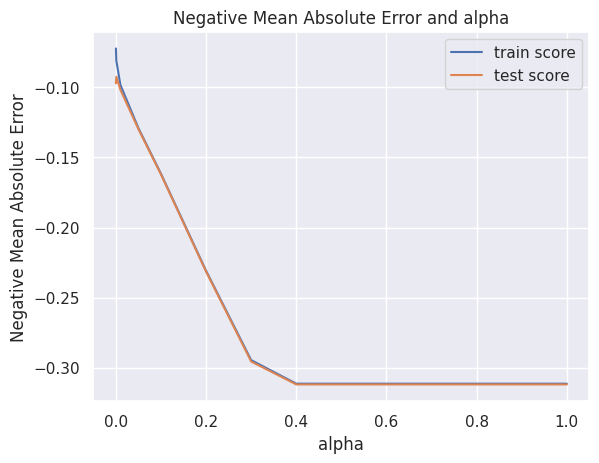

In [109]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter, 
#### but we will choose a low value of alpha to balance the trade-off between Bias-Variance 
#### and to get the coefficients of smallest of features.

In [118]:
# At alpha = 0.001, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.01817788, -0.00330721,  0.01855544,  0.1029293 ,  0.05909609,
        0.        , -0.        ,  0.00303458,  0.00504664,  0.00723677,
        0.        , -0.0041397 ,  0.11769533,  0.03148282,  0.00238935,
        0.03048638,  0.01537067,  0.00884404, -0.00517766,  0.        ,
        0.03923434,  0.01104404,  0.00498714,  0.00853081,  0.00244006,
        0.01278262, -0.02144709, -0.06233727,  0.        ,  0.        ,
        0.01357169, -0.04599356,  0.        , -0.00309488, -0.        ,
        0.        ,  0.        , -0.        ,  0.02587564, -0.        ,
       -0.        , -0.00583479,  0.        , -0.        , -0.        ,
       -0.        ,  0.02148727,  0.        , -0.00549274,  0.09111826,
       -0.06230511, -0.        , -0.03063326, -0.        , -0.        ,
        0.        , -0.        , -0.0063232 ,  0.02502669,  0.05330755,
       -0.        ,  0.        , -0.        , -0.        ,  0.01995456,
        0.056016  ,  0.        ,  0.        , -0.        ,  0.04

#### The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [119]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.849),
 ('MSSubClass', -0.018),
 ('LotFrontage', -0.003),
 ('LotArea', 0.019),
 ('OverallQual', 0.103),
 ('OverallCond', 0.059),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.003),
 ('TotalBsmtSF', 0.005),
 ('1stFlrSF', 0.007),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.004),
 ('GrLivArea', 0.118),
 ('BsmtFullBath', 0.031),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.03),
 ('HalfBath', 0.015),
 ('BedroomAbvGr', 0.009),
 ('KitchenAbvGr', -0.005),
 ('Fireplaces', 0.0),
 ('GarageArea', 0.039),
 ('WoodDeckSF', 0.011),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.009),
 ('3SsnPorch', 0.002),
 ('ScreenPorch', 0.013),
 ('PoolArea', -0.021),
 ('PropAge', -0.062),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.014),
 ('MSZoning_RM', -0.046),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.003),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.026),
 ('LotConfig_FR2', -

In [120]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9030651097985244
0.8727019566739698


In [124]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.14177498627523114


#### The R2 values for Train and Test matches well, indicating an optimum model

In [127]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [128]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,11.849
1,MSSubClass,-0.018
2,LotFrontage,-0.003
3,LotArea,0.019
4,OverallQual,0.103


In [129]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,11.849
13,GrLivArea,0.118
4,OverallQual,0.103
50,Neighborhood_Crawfor,0.091
203,SaleType_New,0.068
...,...,...
153,BsmtFinType1_Unf,-0.047
148,BsmtExposure_none,-0.057
28,PropAge,-0.062
51,Neighborhood_Edwards,-0.062


In [130]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,11.849
13,GrLivArea,0.118
4,OverallQual,0.103
50,Neighborhood_Crawfor,0.091
203,SaleType_New,0.068
...,...,...
153,BsmtFinType1_Unf,-0.047
148,BsmtExposure_none,-0.057
28,PropAge,-0.062
51,Neighborhood_Edwards,-0.062


In [131]:
# These 16 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(77, 2)

In [132]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'Neighborhood_Crawfor', 'SaleType_New', 'OverallCond', 'Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'CentralAir_Y', 'Condition1_Norm', 'SaleCondition_Normal', 'Exterior1st_BrkFace', 'BsmtExposure_Gd', 'Foundation_PConc', 'GarageArea', 'ExterCond_TA', 'BsmtFullBath', 'FullBath', 'LotConfig_CulDSac', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Neighborhood_BrkSide', 'Neighborhood_Somerst', 'BsmtFinType2_Unf', 'LotArea', 'HalfBath', 'Exterior1st_MetalSd', 'FireplaceQu_Gd', 'MSZoning_RL', 'PavedDrive_Y', 'ScreenPorch', 'HouseStyle_1Story', 'Exterior1st_VinylSd', 'WoodDeckSF', 'MiscFeature_none', 'RoofStyle_Hip', 'EnclosedPorch', 'BedroomAbvGr', '1stFlrSF', 'TotalBsmtSF', 'OpenPorchSF', 'BsmtFinSF2', 'BsmtCond_TA', 'BsmtFinType1_GLQ', 'GarageQual_TA', 'BsmtHalfBath', '3SsnPorch', 'Exterior1st_HdBoard', 'GarageType_none', 'GarageFinish_Unf', 'Exterior2nd_Stucco', 'LotFrontage', 'LotShape_IR3', 'LowQualFinSF', 'HeatingQC_Gd', 'Neighborhood_CollgCr'

In [133]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
175,1.229791,-0.059996,1.252715,0.347365,0.478002,0.085426,0.622339,0.166080,0.612765,1.105326,False,-0.261563,0.786946,-0.260661,-0.740805
1408,-0.279140,-1.501313,1.252715,-0.973680,0.256615,-0.943351,-0.935034,-0.261043,-0.432534,-0.807450,False,-0.721923,-1.006519,3.016768,-0.740805
1148,-0.757443,0.660663,1.252715,-1.087563,-0.850325,-0.943351,0.622339,-0.439778,-0.432534,-0.807450,True,-0.721923,-1.006519,-0.260661,-0.740805
861,-0.894101,-0.780655,-1.406374,-0.023894,0.145921,0.870488,-0.935034,0.079341,0.220778,1.105326,True,-0.721923,-1.006519,-0.260661,-0.740805
220,-0.022906,0.660663,-0.520011,1.021554,0.934615,-0.943351,-0.935034,-0.151525,0.133670,-0.807450,True,-0.198065,0.786946,-0.260661,2.124358


In [134]:
X_train_lasso.shape

(1021, 15)

In [135]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
930,-0.117457,1.358461,-0.509551,0.899165,0.657098,-1.009468,-0.987888,-0.211538,0.106932,-0.851855,True,-0.427207,0.798671,-0.293788,-0.019795
530,-0.035051,-0.099887,-0.509551,0.887692,0.608692,0.743814,0.551952,0.029981,0.676372,1.111895,False,-0.673305,0.798671,-0.293788,0.924930
1291,-0.431748,-0.829061,1.350309,-1.019124,-1.017758,-0.518001,-0.987888,-1.583933,-2.360638,-0.851855,False,-0.673305,0.798671,-0.293788,0.627799
1385,-0.715377,-1.558235,2.280239,-0.638220,-1.133933,0.634091,-0.987888,-0.872447,-1.459026,1.111895,False,0.639219,-1.072013,-0.293788,-0.781670
305,0.905907,1.358461,-0.509551,2.124484,2.002793,2.300508,-0.987888,0.065215,0.439105,1.111895,True,-0.673305,0.798671,-0.293788,0.498280


## Ridge Regression

In [136]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [137]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023011,0.008375,0.009844,0.003872,0.0001,{'alpha': 0.0001},-0.113378,-0.088838,-0.108833,-0.108020,...,-0.104280,0.008482,27,-0.070405,-0.075524,-0.072057,-0.062412,-0.071731,-0.070426,0.004349
1,0.030161,0.010783,0.013008,0.004391,0.001,{'alpha': 0.001},-0.113345,-0.088813,-0.108798,-0.108003,...,-0.104245,0.008482,26,-0.070407,-0.075526,-0.072057,-0.062413,-0.071734,-0.070428,0.004350
2,0.026723,0.010099,0.013245,0.004415,0.01,{'alpha': 0.01},-0.113030,-0.088570,-0.108476,-0.107854,...,-0.103923,0.008484,25,-0.070420,-0.075553,-0.072060,-0.062430,-0.071773,-0.070447,0.004352
3,0.020268,0.005975,0.009328,0.003350,0.05,{'alpha': 0.05},-0.111830,-0.087634,-0.107359,-0.107373,...,-0.102850,0.008495,24,-0.070481,-0.075696,-0.072095,-0.062526,-0.071918,-0.070543,0.004362
4,0.022148,0.006335,0.010427,0.004714,0.1,{'alpha': 0.1},-0.110625,-0.086845,-0.106438,-0.106950,...,-0.101946,0.008462,23,-0.070593,-0.075884,-0.072239,-0.062646,-0.072065,-0.070685,0.004381


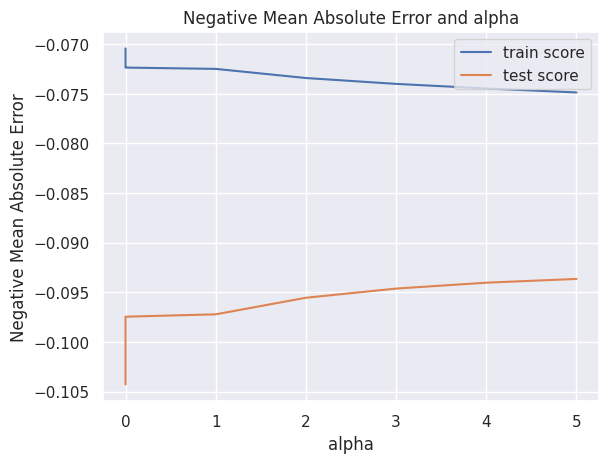

In [138]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [140]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.00947571, -0.0081894 ,  0.0272367 ,  0.07598353,  0.05126079,
        0.00255189, -0.01193295,  0.00609596, -0.00764288,  0.04479559,
        0.04436908,  0.00284147,  0.06999661,  0.02817891,  0.00211672,
        0.03066222,  0.01858828,  0.0146126 , -0.01094567, -0.00928946,
        0.02938516,  0.00910512,  0.00448025,  0.01100495,  0.00556018,
        0.01233927, -0.01440088, -0.03900976,  0.19664014,  0.20839737,
        0.18352749,  0.15014797,  0.02150506, -0.09218113,  0.00495501,
        0.0210238 ,  0.00082799,  0.02156707,  0.02926736, -0.04307744,
       -0.06477343, -0.01668399,  0.01291057, -0.0755812 , -0.06969441,
       -0.06837987,  0.01051067,  0.05100429, -0.01979197,  0.09724734,
       -0.10632594, -0.01899322, -0.09687179, -0.17412546, -0.04382936,
       -0.02477959, -0.00526034, -0.04417577,  0.08001269,  0.08081608,
       -0.05843699,  0.01117595, -0.01907765, -0.00740103,  0.02624152,
        0.10861337,  0.01196433,  0.03572302, -0.00526326,  0.05

In [141]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.678),
 ('MSSubClass', -0.009),
 ('LotFrontage', -0.008),
 ('LotArea', 0.027),
 ('OverallQual', 0.076),
 ('OverallCond', 0.051),
 ('MasVnrArea', 0.003),
 ('BsmtFinSF1', -0.012),
 ('BsmtFinSF2', 0.006),
 ('TotalBsmtSF', -0.008),
 ('1stFlrSF', 0.045),
 ('2ndFlrSF', 0.044),
 ('LowQualFinSF', 0.003),
 ('GrLivArea', 0.07),
 ('BsmtFullBath', 0.028),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.031),
 ('HalfBath', 0.019),
 ('BedroomAbvGr', 0.015),
 ('KitchenAbvGr', -0.011),
 ('Fireplaces', -0.009),
 ('GarageArea', 0.029),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.004),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.006),
 ('ScreenPorch', 0.012),
 ('PoolArea', -0.014),
 ('PropAge', -0.039),
 ('MSZoning_FV', 0.197),
 ('MSZoning_RH', 0.208),
 ('MSZoning_RL', 0.184),
 ('MSZoning_RM', 0.15),
 ('LotShape_IR2', 0.022),
 ('LotShape_IR3', -0.092),
 ('LotShape_Reg', 0.005),
 ('LandContour_HLS', 0.021),
 ('LandContour_Low', 0.001),
 ('LandContour_Lvl', 0.022),
 ('LotConfig_CulDSac', 0.029),
 

In [143]:
# ridge regression
lm = Ridge(alpha=1)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.924765828841152
0.8749917313489645


In [144]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1404941107912515


#### It is visible that the model performance is better than Lasso.  The train and the test scores are matching well

In [145]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.678
30,MSZoning_RH,0.208
29,MSZoning_FV,0.197
31,MSZoning_RL,0.184
32,MSZoning_RM,0.150
204,SaleType_Oth,0.141
135,Foundation_Stone,0.137
111,Exterior2nd_CmentBd,0.122
95,Exterior1st_BrkFace,0.115
66,Neighborhood_StoneBr,0.109


In [146]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.678
30,MSZoning_RH,0.208
29,MSZoning_FV,0.197
31,MSZoning_RL,0.184
32,MSZoning_RM,0.150
...,...,...
79,BldgType_Twnhs,-0.101
51,Neighborhood_Edwards,-0.106
83,HouseStyle_2.5Fin,-0.124
94,Exterior1st_BrkComm,-0.156


In [147]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,11.678
30,MSZoning_RH,0.208
29,MSZoning_FV,0.197
31,MSZoning_RL,0.184
32,MSZoning_RM,0.150
...,...,...
79,BldgType_Twnhs,-0.101
51,Neighborhood_Edwards,-0.106
83,HouseStyle_2.5Fin,-0.124
94,Exterior1st_BrkComm,-0.156


In [148]:
predRFE.shape

(206, 2)

### Observation:
#### The performance of Ridge and Lasso is similar,
#### it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
#### the predictive variables.
#### It is always advisable to use simple yet robust model.

#### Equation can be formulated using the features and coefficients obtained by Lasso

### Assign the Features as x1, x2.....



In [ ]:
pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16']), inplace = True) 
pred

### These are the final features that should be selected for predicting the price of house

### Hence the equation:
    
####    Log(Y) = C + 0.125(x1) + 0.112(x2) +  0.050(x3) + 0.042(x4) + 0.035(x5) + 0.034(x6) + 0.024(x7) +  0.015(x8) + 0.014(x9) + 0.010(x10)
####                + 0.010(x11) + 0.005(x12) - 0.007(x13) - 0.007(x14) - 0.008(x15) - 0.095(x16) + Error term(RSS + alpha * (sum of absolute value of coefficients)

### INFERENCE


#### Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.

#### The higher values of positive coeeficients suggest a high sale value.

#### Some of those features are:-
 |  Feature  |  Description  |
 |  ---  |  ---  |
 |  GrLivArea  |  Above grade (ground) living area square feet  |
 |  OverallQual  |  Rates the overall material and finish of the house  |
 |  OverallCond  |  Rates the overall condition of the house  |
 |  TotalBsmtSF  |  Total square feet of basement area  |
 |  GarageArea   |Size of garage in square feet  |
        
#### The higher values of negative coeeficients suggest a decrease in sale value.

#### Some of those features are:-
   |  Feature  |  Description  |
   |  ---  |  ---  |
   |  PropAge  |  Age of the property at the time of seeling  |
   |  MSSubClass  |  Identifies the type of dwelling involved in the sale  |

#### When the market value of the property is lower than the Predicted Sale Price, its the time to buy.